<a href="https://colab.research.google.com/github/Raanank10/UK_Used_Car_Data/blob/main/100000_UK_Used_Car_Data_set_regression_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
# General tools
import numpy as np
import scipy as sp
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# For the tree visualization
import pydot
from IPython.display import Image, display
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

## Get the Data

In [112]:
url = 'https://raw.githubusercontent.com/Raanank10/UK_Used_Car_Data/main/toyota.csv'

df_Toyota = pd.read_csv(url)
df_Toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [113]:
df_Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [114]:
df_Toyota.shape

(6738, 9)

## Cleaning

deleting duplicates and row counts under 30. We can`t assume anything based on pole of under 30 cars


In [115]:
unique_Toyota = df_Toyota.drop_duplicates(inplace=False)
unique_Toyota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


In [129]:
unique_Toyota.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [116]:
unique_Toyota.fuelType.value_counts()

Petrol    4058
Hybrid    2040
Diesel     496
Other      105
Name: fuelType, dtype: int64

In [95]:
unique_Toyota.transmission.value_counts()

Manual       3793
Automatic    2651
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [117]:
# unique_Toyota.groupby('transmission').filter(lambda x : len(x)>30)
# unique_Toyota.transmission.value_counts()

unique_Toyota = unique_Toyota[unique_Toyota.groupby('transmission')\
                              .transmission.transform('count')>30].copy() 
unique_Toyota.transmission.value_counts()

Manual       3793
Automatic    2651
Semi-Auto     254
Name: transmission, dtype: int64

In [60]:
unique_Toyota.model.value_counts()

 Yaris            2117
 Aygo             1940
 Auris             709
 C-HR              479
 RAV4              467
 Corolla           265
 Prius             232
 Verso             114
 Avensis           114
 Hilux              85
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [118]:
unique_Toyota = unique_Toyota[unique_Toyota.groupby('model')\
                              .model.transform('count')>30].copy() 
unique_Toyota.model.value_counts()

 Yaris           2116
 Aygo            1940
 Auris            709
 C-HR             479
 RAV4             467
 Corolla          265
 Prius            232
 Verso            114
 Avensis          114
 Hilux             85
 GT86              73
 Land Cruiser      51
Name: model, dtype: int64

In [61]:
unique_Toyota.year.value_counts()

2017    2015
2019    1265
2018    1014
2016     990
2015     522
2014     351
2013     203
2020     127
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
1998       1
2001       1
1999       1
2000       1
Name: year, dtype: int64

In [119]:
unique_Toyota = unique_Toyota[unique_Toyota.groupby('year')\
                              .year.transform('count')>30].copy() 
unique_Toyota.year.value_counts()

2017    2015
2019    1230
2018    1014
2016     990
2015     521
2014     351
2013     200
2020     124
2012      39
2011      34
Name: year, dtype: int64

In [121]:
unique_Toyota.tax.value_counts() 

145    2030
0      1774
135     668
30      571
150     522
20      230
140     221
125     184
260      84
200      67
265      40
160      32
205      26
165      19
10       19
300       9
235       9
325       7
305       2
540       1
240       1
250       1
330       1
Name: tax, dtype: int64

In [122]:
unique_Toyota = unique_Toyota[unique_Toyota.groupby('tax')\
                              .tax.transform('count')>30].copy() 
unique_Toyota.tax.value_counts()

145    2030
0      1774
135     668
30      571
150     522
20      230
140     221
125     184
260      84
200      67
265      40
160      32
Name: tax, dtype: int64

In [123]:
unique_Toyota.engineSize.value_counts()

1.0    2006
1.5    1413
1.8    1229
1.3     563
2.0     344
1.2     299
2.5     236
1.6     149
2.4      70
1.4      36
2.2      35
2.8      28
3.0       9
0.0       6
Name: engineSize, dtype: int64

In [124]:
unique_Toyota = unique_Toyota[unique_Toyota.groupby('engineSize')\
                              .engineSize.transform('count')>30].copy() 
unique_Toyota.engineSize.value_counts()

1.0    2006
1.5    1413
1.8    1229
1.3     563
2.0     344
1.2     299
2.5     236
1.6     149
2.4      70
1.4      36
2.2      35
Name: engineSize, dtype: int64

In [125]:
unique_Toyota.describe()

,year,price,mileage,tax,mpg,engineSize
count,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000
mean,2016.956426,12363.463166,21595.529624,91.291536,63.930831,1.448307
std,1.669601,5527.063286,16619.885800,70.752963,15.555708,0.404201
min,2011.000000,2395.000000,2.000000,0.000000,2.800000,1.000000
25%,2016.000000,8377.250000,9359.000000,0.000000,56.500000,1.000000
50%,2017.000000,10800.000000,18000.000000,135.000000,65.700000,1.500000
75%,2018.000000,14952.500000,30023.250000,145.000000,70.600000,1.800000
max,2020.000000,39257.000000,150000.000000,265.000000,235.000000,2.500000


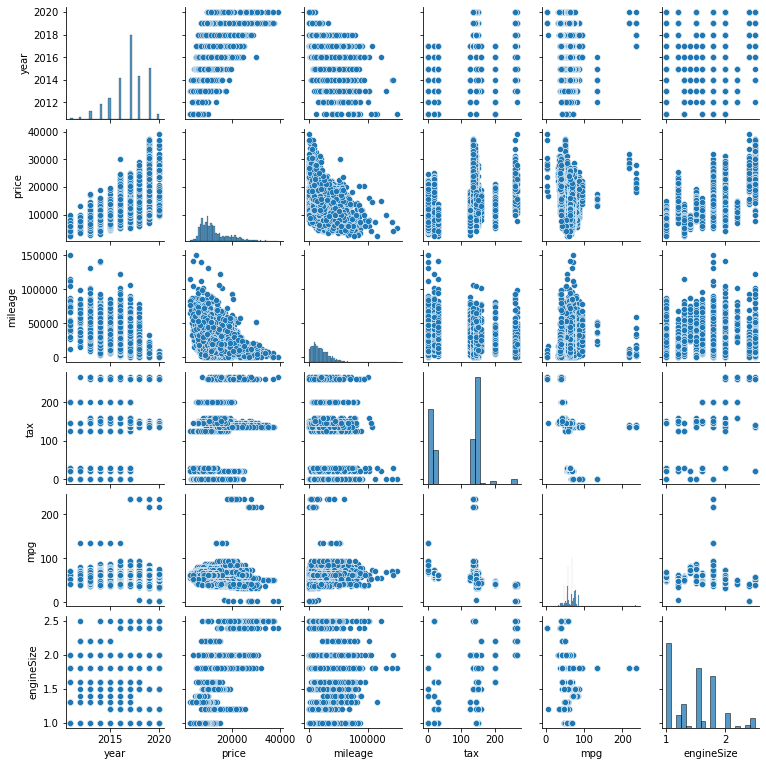

In [126]:
unique_Toyota_num = unique_Toyota.select_dtypes(include=np.number)
sns.pairplot(unique_Toyota_num, height=1.8)

In [127]:
unique_Toyota.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.419108,-0.670726,0.553760,-0.152571,-0.014883
price,0.419108,1.000000,-0.254896,0.233002,0.031301,0.750023
mileage,-0.670726,-0.254896,1.000000,-0.364331,0.133303,0.175802
tax,0.553760,0.233002,-0.364331,1.000000,-0.385381,0.065992
mpg,-0.152571,0.031301,0.133303,-0.385381,1.000000,-0.012828
engineSize,-0.014883,0.750023,0.175802,0.065992,-0.012828,1.000000


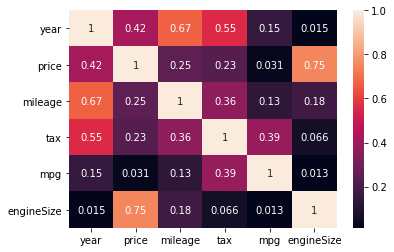

In [130]:
sns.heatmap(unique_Toyota.corr().abs(), annot=True)

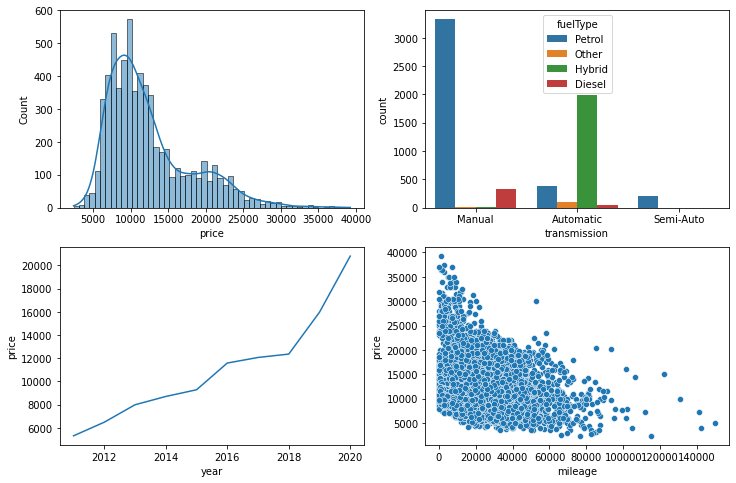

In [133]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.histplot(unique_Toyota.price, kde=True, ax=ax[0,0])
sns.countplot(x='transmission', data=unique_Toyota, hue='fuelType', ax=ax[0,1])
sns.lineplot(x='year', y='price', data=unique_Toyota, ci=None, ax=ax[1,0])
sns.scatterplot(x='mileage', y='price', data=unique_Toyota, ax=ax[1,1]);